In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from scipy.stats import multivariate_normal
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [3]:
california_housing = fetch_california_housing(as_frame=True)

In [5]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
df=california_housing.data

In [24]:
def expectation_step(X, pi, mu, sigma):
    N, D = X.shape
    K = len(pi)
    re = np.zeros((N, K))
    for k in range(K):
        re[:, k] = pi[k] * multivariate_normal.pdf(X, mean=mu[k], cov=sigma[k])
    resp_sum = np.sum(re, axis=1)
    for k in range(K):
        re[:, k] /= resp_sum
    return re

In [26]:
def maximization_step(X, re):
    N, D = X.shape
    K = re.shape[1]
    pi = np.sum(re, axis=0) / N
    mu = np.zeros((K, D))
    for k in range(K):
        mu[k] = np.sum(re[:, k].reshape(-1, 1) * X, axis=0) / np.sum(re[:, k])
    cov = np.zeros((K, D, D))
    for k in range(K):
        diff = X - mu[k]
        cov[k] = np.dot(re[:, k] * diff.T, diff) / np.sum(re[:, k])
    return pi, mu, cov

In [20]:
def EM(X, K, max_iter=100):
    N, D = X.shape
    pi = np.ones(K) / K
    mu = np.random.randn(K, D)
    sigma = np.array([np.eye(D) for _ in range(K)])
    for i in range(max_iter):
        resp = expectation_step(X, pi, mu, sigma)
        pi, mu, sigma = maximization_step(X, resp)

    return pi, mu, sigma

In [7]:
pca = PCA(n_components=2)
data=pca.fit_transform(df)
scalar=StandardScaler()
scale=scalar.fit_transform(data)

In [14]:
df1=pd.DataFrame(scale)

In [15]:
def predict_clusters(data, pi, mu, sigma):
    posterior_probs = np.zeros((data.shape[0], pi.shape[0]))
    for k in range(pi.shape[0]):
        posterior_probs[:, k] = pi[k] * multivariate_normal.pdf(data, mean=mu[k], cov=sigma[k])
    cluster_labels = np.argmax(posterior_probs, axis=1)
    return cluster_labels

In [29]:
k=[2,3,4]
score=[]


 when k is : 2
mu values are: [[ 1.35099848 -0.32223327]
 [-0.25996599  0.06200576]]
var is : [[[ 2.86221596  0.63149274]
  [ 0.63149274  0.9118234 ]]

 [[ 0.22286697 -0.02162596]
  [-0.02162596  0.99314235]]]
pi is  [0.16137289 0.83862711]
_____________________________________________________
silhietter score is: 0.45556235614745655


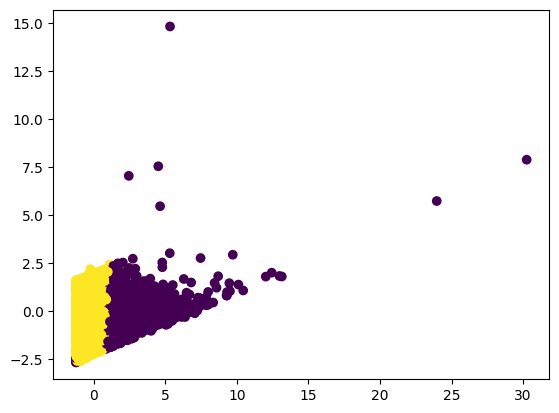


 when k is : 3
mu values are: [[ 0.40347095 -0.51578752]
 [ 2.90526621 -0.11642989]
 [-0.38052353  0.26139165]]
var is : [[[0.59915018 0.25424738]
  [0.25424738 0.72903138]]

 [[5.81619995 1.30014726]
  [1.30014726 1.35611735]]

 [[0.14315955 0.01655894]
  [0.01655894 0.91097788]]]
pi is  [0.31677868 0.04022497 0.64299635]
_____________________________________________________
silhietter score is: 0.2928475831611473


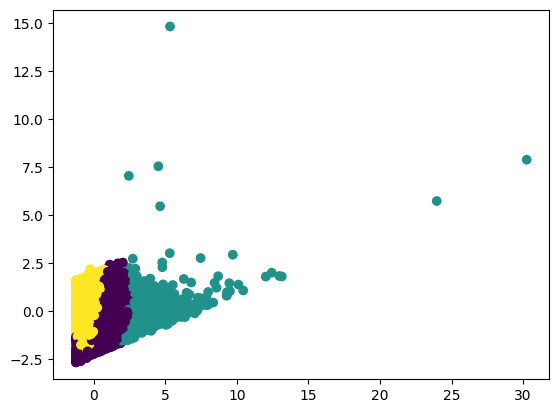


 when k is : 4
mu values are: [[ 3.96700071  0.34948061]
 [-0.12670361 -0.39760574]
 [-0.49406576  0.80073764]
 [ 0.97607462 -0.56694509]]
var is : [[[8.44883221 1.38737483]
  [1.38737483 1.964857  ]]

 [[0.25658232 0.19763074]
  [0.19763074 0.77497574]]

 [[0.09727834 0.02829325]
  [0.02829325 0.44580736]]

 [[0.89720187 0.26332637]
  [0.26332637 0.56329005]]]
pi is  [0.01897866 0.48016891 0.34236088 0.15849155]
_____________________________________________________
silhietter score is: 0.3190477340273655


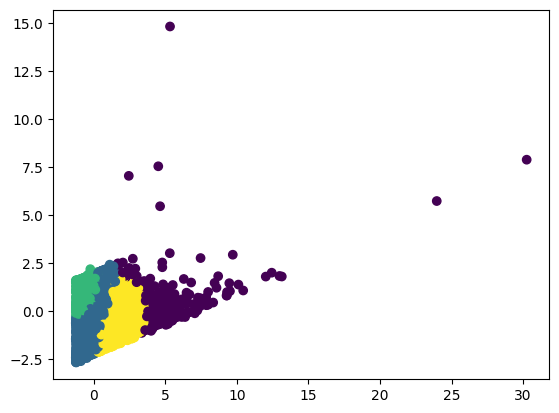

In [41]:
for i in k:
    print('\n when k is :',i)
    pi,mu,var=EM(df1, i, max_iter=1000)
    print('mu values are:',mu,'\nvar is :',var,'\npi is :',pi)
    print("_____________________________________________________")
    prediction_k2=predict_clusters(df,pi,mu,var)
    sscore=silhouette_score(df,prediction_k2)
    print('silhietter score is:',sscore)
    score.append(sscore)
    plt.scatter(df[0],df[1],c=prediction_k2)
    plt.show()

In [43]:
for i in range(3):
  print('when k is ',k[i],'\nscore :',score[i])

when k is  2 
score : 0.45556235614745655
when k is  3 
score : 0.28816126986470764
when k is  4 
score : 0.39886645040666996
